In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
image_size = 128
batch_size = 32

def load_images_from_folder(folder):
    images = []
    labels = []
    for category in os.listdir(folder):
        category_path = os.path.join(folder, category)
        label = os.listdir(folder).index(category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (image_size, image_size))
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

dataset_folder = "/content/sample_data/images"
X, y = load_images_from_folder(dataset_folder)

In [3]:
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(os.listdir(dataset_folder)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=20,
                    validation_data=(X_test, y_test))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.1708 - loss: 2.6623 - val_accuracy: 0.1875 - val_loss: 2.5012
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2145 - loss: 2.4039 - val_accuracy: 0.0625 - val_loss: 2.4803
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.1110 - loss: 2.3374 - val_accuracy: 0.0625 - val_loss: 2.4226
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.1443 - loss: 2.3262 - val_accuracy: 0.0625 - val_loss: 2.4065
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.1656 - loss: 2.2828 - val_accuracy: 0.0625 - val_loss: 2.4183
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.1104 - loss: 2.2922 - val_accuracy: 0.0625 - val_loss: 2.4481
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.1614 - loss: 2.2636 - val_accuracy: 0.0625 - val_loss: 2.4850
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.2674 - loss: 2.1450 - val_accuracy: 0.1250 - val_loss: 2.5111
Epoch 9/20
2/2 ━

In [10]:
calorie_dict = {
    'pizza': 266,
    'apple_pie': 300,
    'hamburger': 354,
    'onion_rings': 220,
    'donut': 260,
    'ice_cream': 180,
    'ramen': 450,
    'samosa': 300,
    'sushi': 264,
    'tacos': 321,
}
def estimate_calories(predicted_class):
    food_item = os.listdir(dataset_folder)[predicted_class]
    return calorie_dict.get(food_item, 0)

predicted_class = np.argmax(model.predict(X_test[0:1]))
calories = estimate_calories(predicted_class)
print(f"Predicted food item: {os.listdir(dataset_folder)[predicted_class]}, Estimated calories: {calories}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted food item: pizza, Estimated calories: 266


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.2500 - loss: 2.5078
Test Accuracy: 0.25


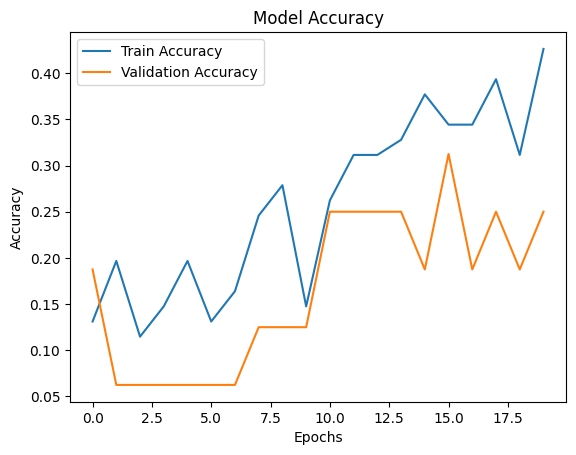

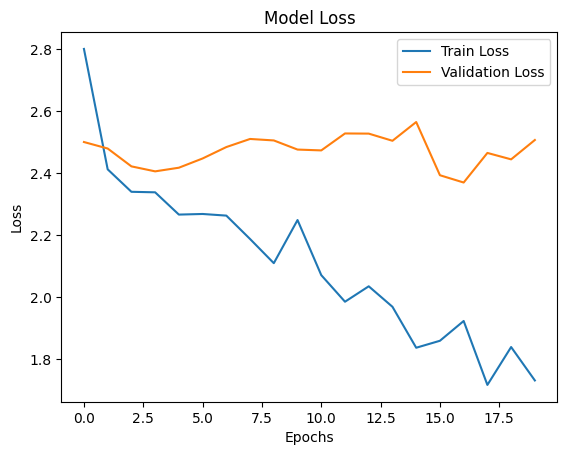

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
